In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# Obtain data

df = pd.DataFrame(data=load_iris().data, columns=load_iris().feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Checking missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
# Preprocessing
# For preprocessing, we will normalize the data
x = StandardScaler().fit_transform(df)
y = load_iris().target

# Principal Component Analysis

### Think of PCA as compressing the feature matrix into a smaller one like how your computer does when zipping multiple files together. The result is a matrix with less columns but it still holds similar values for the machine learning model. To use PCA, simply instantiate the PCA object and pass in the desired output column dimension to the n_components parameter

In [8]:
# Instantiate PCA object and set the output dimensions to 2

pca = PCA(n_components=2)

# Use the PCA object to transform the data
principalComponents = pca.fit_transform(x)

In [9]:
principalComponents = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalComponents.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


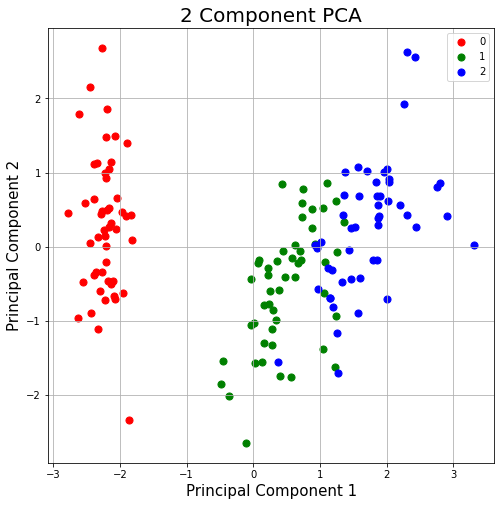

In [10]:
# Create figure and axes for the plot
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = np.unique(y) # Get all label names
colors = ['red', 'green', 'blue'] # Create a list of colors to assign to each label

# Iterate through the data set and color each label with the corresponding color
# Create a scatter plot to visualize the 2 dimensions of the new dataset

for target, color in zip(targets, colors):
    indicesTokeep = y == target
    ax.scatter(principalComponents.loc[indicesTokeep, 'PC1'],
               principalComponents.loc[indicesTokeep, 'PC2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

# Kernel PCA

#### The kernel trick is a concept that we've already learned from the Support Vector Machine chapter. However, the rbf kernel can also be used for dimensionality reduction. In SVM, the kernel trick maps instances into a high-dimensional space. The same concept can be applied to PCA making it possible to perform complex nonlinear projections for dimensionality reduction. The hyperparameter gamma is also used as the regularization parameter. Like other hyperparameters, this often requires tuning betweeen various values in order to find an optimal one. In this section, we will learn how to use Kernel PCA with an SVM Classification model.

In [12]:
from sklearn.pipeline import Pipeline

# Create kpca instance
kpca = KernelPCA(n_components=2, kernel='rbf')

# Build a pipeline with PCA and SVC
pipeline = Pipeline([("kpca", kpca), ("svc", SVC())])


# Select parameters range for kpca
# Select all values from 0.03 to 0.05 incremented by 0.001
kpca_params = [{"kpca__gamma": np.arange(0.03, 0.05, 0.001)}]

In [18]:
# Tune the gamma hyperparameter

kpca_tune = GridSearchCV(pipeline, kpca_params, cv=5)
kpca_tune.fit(x, y)
kpca_tune.best_params_

ValueError: Invalid parameter 'kpca_gamma' for estimator Pipeline(steps=[('kpca', KernelPCA(kernel='rbf', n_components=2)),
                ('svc', SVC())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [19]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.47)

# Use the pca object to transform the data
principalComponents = kpca.fit_transform(x)

In [20]:
principalComponents = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalComponents.head()

,PC1,PC2
0,0.779922,-0.031758
1,0.611627,0.052033
2,0.723806,0.009941
3,0.653057,0.026709
4,0.749057,-0.043824


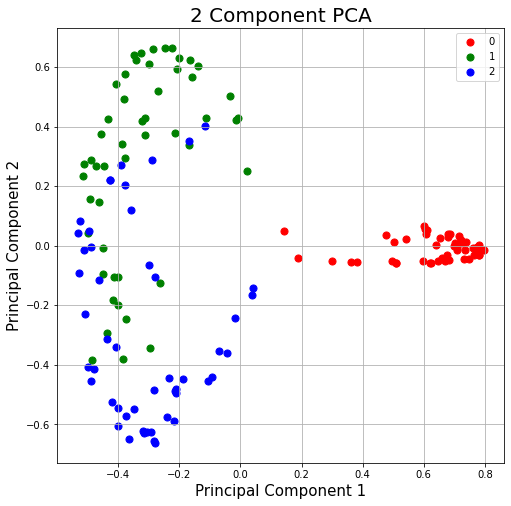

In [21]:
# Create figure and axes for the plot
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = np.unique(y) # get all label names
colors = ['red', 'green', 'blue'] # Create a list of colors to assign to each label

# Iterate through the data set and color each label with the corresponding color
# Create a scatter plot to visualize the 2 dimensions of the new dataset

for target, color in zip(targets, colors):
    indicesTokeep = y == target
    ax.scatter(principalComponents.loc[indicesTokeep, 'PC1'],
               principalComponents.loc[indicesTokeep, 'PC2'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()